# (1) LSA

DTM과 TF-IDF 행렬같이 Bag of Words를 기반으로 한 표현 방법은 근본적으로 단어의 의미를 벡터로 표현하지 못한다는 한계를 가지고 있다.    
이를 해결할 수 있는 방법으로 LSA(Latent Semantic Analysis)가 있다.

## LSA(Latent Semantic Analysis)
잠재 의미 분석이라고 불리는 LSA(Latent Semantic Analysis)는 전체 코퍼스에서 문서 속 단어들 사이의 관계를 찾아내는 자연어 처리 정보 검색 기술    
이 방법은 빈도가 몇인지 판단하는 것 보다 효과적이며 LSA를 사용하면 단어와 단어 사이, 문서와 문서 사이, 단어와 문서 사이의 의미적 유사성 점수를 찾아낼 수 있다.    

## 특잇값 분해
선형대수학의 특잇값 분해(Singular Value Decompotion) 에 대해 이해를 해야 LSA를 이해할 수 있다.    
아래 문서에 있는 `부록 : 행렬의 종류`에서 단위행렬, 역행렬, 직교 행렬, 정방 행렬의 내용을 읽어보는게 좋다.    
고유값 (Eigenvalue) 과 고유벡터 (Eigenvector)) : https://modulabs.co.kr/blog/eigenvalue-and-eigenvector

**특잇값 분해(Singular Value Decomposition, SVD)**란 m × n 크기의 임의의 사각 행렬 A를 아래 그림의 Full SVD와 같이     
특이 벡터(singular vector)의 행렬와 특잇값(singular value)의 대각행렬로 분해하는 것을 말한다.    
특잇값 분해를 좀 더 자세히 이해하기 위해서 아래의 글을 도입부부터 '파이썬을 사용한 특이 분해'를 읽어보고    
좀더 직관적이고 쉬운 설명이 필요하다면 그 아래의 동영상 링크를 함께 참고
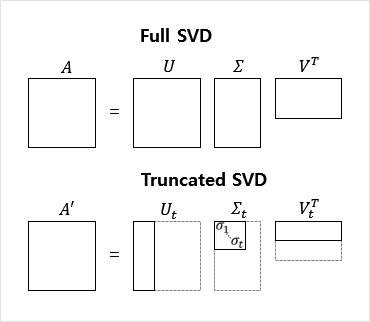    
출처 : https://wikidocs.net/24949    

특잇값 분해 : https://datascienceschool.net/02%20mathematics/03.04%20%ED%8A%B9%EC%9E%87%EA%B0%92%20%EB%B6%84%ED%95%B4.html
Singular value decomposition의 목적 : https://www.youtube.com/watch?v=vxJ1MzfvL5w

### 특별한 특잇값 분해 
특잇값 가운데 가장 큰 t개만 남기고 해당 특잇값에 대응되는 특이 벡터(singular vector) 들로      
행렬 A를 근사(approximate) 하도록 하면 **절단된 특잇값 분해(Truncated SVD)** 라고 한다.
    
Truncated SVD를 수행하면 행렬 Σ의 대각 원솟값 중에서 상윗값 t개만 남게 되며, U행렬과 V행렬의 t열까지만 남는다.    
이로 인해 세 행렬에서 값(정보)의 손실이 일어나 기존의 행렬 A를 정확히 복구할 수는 없게 된다.    

여기서 t는 사용자가 직접 값을 선택하며 성능에 영향을 주는 매개변수인 하이퍼파라미터이며,    
t를 크게 잡으면 기존의 행렬 A로부터 다양한 의미를 가져갈 수 있지만, 노이즈를 제거하려면 t를 작게 잡아야 한다.

## LSA와 Truncated SVD
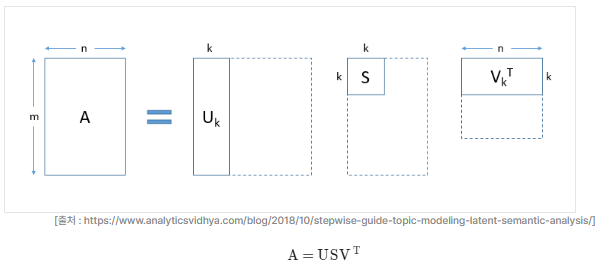
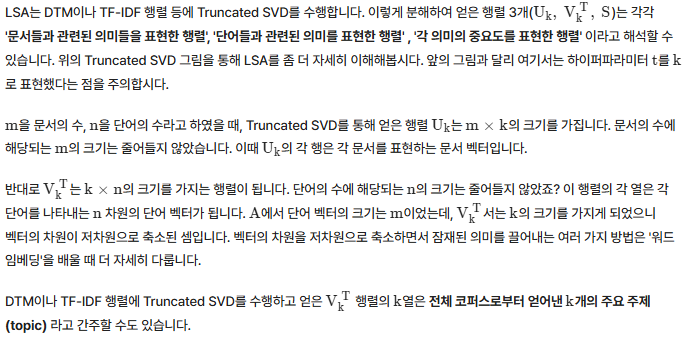

# (2) LSA 실습

In [1]:
# 필요한 도구를 임포트
import pandas as pd
import numpy as np
import urllib.request
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
print('=3')

=3


In [3]:
# NLTK 데이터셋을 다운로드
# NLTK는 데이터셋을 다운로드해 주지 않으면 NLTK의 도구들이 제대로 동작하지 않는다.

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# 이거 추가로 다운로드해야함
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nini\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nini\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nini\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\nini\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

## 데이터 다운로드 및 확인

In [4]:
# 실습을 위해 데이터를 다운로드
import os

# csv_filename = os.getenv('HOME')+'/aiffel/topic_modelling/data/abcnews-date-text.csv'
csv_filename = './abcnews-date-text.csv'

# 파일 다운로드
url = "https://raw.githubusercontent.com/franciscadias/data/master/abcnews-date-text.csv"
urllib.request.urlretrieve(url, filename=csv_filename)

('./abcnews-date-text.csv', <http.client.HTTPMessage at 0x21ac4f5a390>)

In [7]:
# 다운로드한 데이터를 데이터프레임에 저장하고 전체 샘플의 수를 출력
data = pd.read_csv(csv_filename, on_bad_lines='skip')
data.shape

(1082168, 2)

In [8]:
# 약 108만 개의 샘플중 5개의 샘플만 출력
data.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


In [12]:
# publish_date는 이번 실습에 불필요하므로 headline_text만 별도로 저장
text = data[['headline_text']].copy()
text.head()

,headline_text
0,aba decides against community broadcasting lic...
1,act fire witnesses must be aware of defamation
2,a g calls for infrastructure protection summit
3,air nz staff in aust strike for pay rise
4,air nz strike to affect australian travellers


In [14]:
#데이터에 중복이 있는지 확인 (중복을 제외하고 유일한 시퀀스를 가지는 샘플의 개수를 출력)
text.nunique()

headline_text    1054983
dtype: int64

* 약 108만 개의 샘플 중 중복을 제외하면 약 105만 개의 샘플이 존재
* 약 3만 개의 샘플이 중복 샘플임을 의미

In [15]:
# 중복샘플 제거
text.drop_duplicates(inplace = True) # 중복샘플 제거
text.reset_index(drop = True, inplace = True)
text.shape

(1054983, 1)

## 데이터 정제 및 정규화
* NLTK의 토크나이저를 이용해 전체 텍스트 데이터에 대해서 단어 토큰화를 수행
* NLTK가 제공하는 불용어 리스트를 사용하여 불용어를 제거

In [16]:
# NLTK 토크나이저를 이용해서 토큰화
text['headline_text'] = text.apply(lambda row: nltk.word_tokenize(row['headline_text']), axis=1)

# 불용어 제거
stop_words = stopwords.words('english')
text['headline_text'] = text['headline_text'].apply(lambda x: [word for word in x if word not in (stop_words)])

text.head()

,headline_text
0,"[aba, decides, community, broadcasting, licence]"
1,"[act, fire, witnesses, must, aware, defamation]"
2,"[g, calls, infrastructure, protection, summit]"
3,"[air, nz, staff, aust, strike, pay, rise]"
4,"[air, nz, strike, affect, australian, travellers]"


이제 동일한 단어지만 다른 표현을 가지는 단어들을 하나의 단어로 통합(lemmatization)하는 단어 정규화 과정, 그리고 길이가 1 ~ 2인 단어를 제거하는 전처리를 진행

In [17]:
# 단어 정규화. 3인칭 단수 표현 -> 1인칭 변환, 과거형 동사 -> 현재형 동사 등을 수행한다.
text['headline_text'] = text['headline_text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x])

# 길이가 1 ~ 2인 단어는 제거.
text = text['headline_text'].apply(lambda x: [word for word in x if len(word) > 2])
print(text[:5])

0     [aba, decide, community, broadcast, licence]
1    [act, fire, witness, must, aware, defamation]
2       [call, infrastructure, protection, summit]
3            [air, staff, aust, strike, pay, rise]
4    [air, strike, affect, australian, travellers]
Name: headline_text, dtype: object


## 역토큰화 및 DTM 생성
DTM을 생성하는 CountVectorizer 또는 TF-IDF 행렬을 생성하는 TfidfVectorizer의 입력으로 사용하기 위해서 역토큰화(detokenization) 를 수행

In [18]:
# 역토큰화 (토큰화 작업을 역으로 수행)
detokenized_doc = []
for i in range(len(text)):
    t = ' '.join(text[i])
    detokenized_doc.append(t)

train_data = detokenized_doc
print('=3')

=3


In [19]:
# 전처리 최종 결과는 train_data에 저장, 5개의 샘플을 출력
train_data[:5]

['aba decide community broadcast licence',
 'act fire witness must aware defamation',
 'call infrastructure protection summit',
 'air staff aust strike pay rise',
 'air strike affect australian travellers']

* 전처리 최종 결과인 train_data는 다음에 배울 LDA 실습에서도 재사용 할 예정
* CountVectorizer를 사용하여 DTM을 생성
* 단어의 수는 5,000개로 제한

In [20]:
# 상위 5000개의 단어만 사용
c_vectorizer = CountVectorizer(stop_words='english', max_features = 5000)
document_term_matrix = c_vectorizer.fit_transform(train_data)
print('=3')

=3


In [21]:
# DTM의 크기를 확인
print('행렬의 크기 :',document_term_matrix.shape)

행렬의 크기 : (1054983, 5000)


DTM의 크기(shape)는 (문서의 수 × 단어 집합의 크기)입니다.

## scikit-learn TruncatedSVD 활용
이제 Truncated SVD를 통해 LSA를 수행하기
* 토픽수 10
* 이는 앞서 배운 하이퍼파라미터 $k$에 해당되며, 행렬 $V_k^T$가   $k × (단어의 수)$ 의 크기를 가지도록 DTM에 **TruncatedSVD**를 수행한다.
* https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html#sklearn.decomposition.TruncatedSVD.fit_transform



In [22]:
from sklearn.decomposition import TruncatedSVD

n_topics = 10
lsa_model = TruncatedSVD(n_components = n_topics)
lsa_model.fit_transform(document_term_matrix)

array([[ 1.20270835e-02, -3.60696341e-03,  1.82873734e-02, ...,
         2.63227790e-03,  1.79300490e-03,  1.43520486e-02],
       [ 2.90210383e-02, -1.07885942e-02,  1.81767582e-02, ...,
         7.94898607e-04, -6.90242010e-03, -7.33444542e-03],
       [ 5.02698980e-03, -1.93800520e-03,  9.76533695e-03, ...,
        -3.27458201e-03,  1.68337217e-03,  3.38621523e-03],
       ...,
       [ 2.96910375e-02,  4.32334939e-03,  2.52136919e-02, ...,
         2.17239841e-02,  1.30343086e-02,  7.09799173e-03],
       [ 6.14387770e-02, -2.81222734e-03,  1.36792426e-01, ...,
         8.94150838e-01,  7.80123366e-01, -2.91866005e-01],
       [ 7.12626511e-02,  2.89389595e-02, -7.85784232e-04, ...,
        -8.59945160e-03, -1.69113929e-02,  2.38476428e-02]])

TruncatedSVD를 통해 얻은 행렬 $V_k^T$ 의 크기를 확인

In [23]:
print(lsa_model.components_.shape)

(10, 5000)


$V_k^T$가   $k × (단어의 수)$의 크기를 가지는 것을 확인할 수 있습니다.    
이제 각 행을 전체 코퍼스의 $k$개의 주제(topic)로 판단하고 각 주제에서 n개씩 단어를 출력해보기

In [24]:
terms = c_vectorizer.get_feature_names_out() # 단어 집합. 5,000개의 단어가 저장됨.

def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(5)) for i in topic.argsort()[:-n - 1:-1]])
get_topics(lsa_model.components_, terms)

Topic 1: [('police', 0.74691), ('man', 0.4538), ('charge', 0.21104), ('new', 0.14079), ('court', 0.11142)]
Topic 2: [('man', 0.69407), ('charge', 0.30022), ('court', 0.16818), ('face', 0.11495), ('murder', 0.10574)]
Topic 3: [('new', 0.83752), ('plan', 0.23618), ('say', 0.18237), ('govt', 0.10982), ('council', 0.10926)]
Topic 4: [('say', 0.73935), ('plan', 0.359), ('govt', 0.16719), ('council', 0.12983), ('urge', 0.07768)]
Topic 5: [('plan', 0.73388), ('council', 0.17956), ('govt', 0.14114), ('urge', 0.0881), ('water', 0.06521)]
Topic 6: [('govt', 0.55357), ('court', 0.26252), ('urge', 0.26203), ('fund', 0.19819), ('face', 0.15841)]
Topic 7: [('charge', 0.50085), ('court', 0.4548), ('face', 0.36866), ('plan', 0.11934), ('murder', 0.11772)]
Topic 8: [('win', 0.63687), ('court', 0.39961), ('kill', 0.12303), ('australia', 0.1114), ('council', 0.09474)]
Topic 9: [('win', 0.6164), ('charge', 0.47752), ('council', 0.13245), ('open', 0.05971), ('cup', 0.05938)]
Topic 10: [('council', 0.84351)

# (3) LDA
문서의 집합에서 토픽을 찾아내는 프로세스를 토픽 모델링(Topic Modelling) 이라고한다.    
고객의 소리와 같이 많은 문서에서 주요 주제를 알아내는 일이 중요할 때 사용한다.    
잠재 디리클레 할당(Latent Dirichlet Allocation, LDA) 은 토픽 모델링의 또 다른 대표적인 알고리즘    
LDA는 문서들이 토픽들의 혼합으로 구성되어 있으며, 토픽들은 확률 분포에 기반하여 단어들을 생성    
데이터가 주어지면, LDA는 이 가정에 따라 단어들의 분포로부터 문서가 생성되는 과정을 역추적해 문서의 토픽을 찾아낸다.

## LDA(Latent Dirichlet Allocation) 시뮬레이션
LDA를 배우기에 앞서 LDA를 시뮬레이션해 보기    
LDA Topic Modeling Simulation : https://lettier.com/projects/lda-topic-modeling/

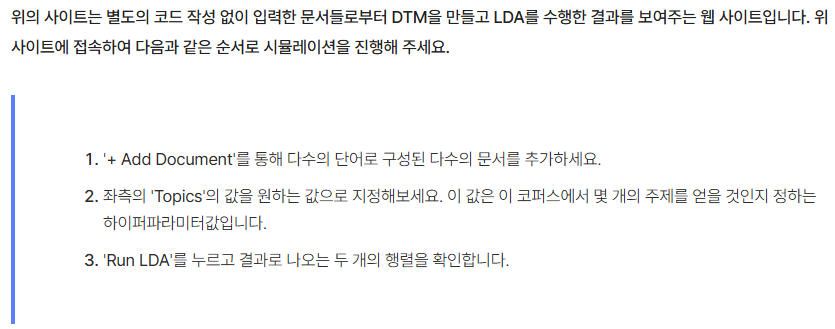

## LDA(Latent Dirichlet Allocation)의 두 가지 결과
LDA는 각 토픽의 단어 분포와 각 문서의 토픽 분포를 추정해낸다.    
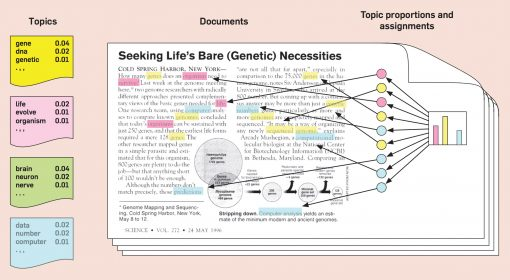    
[출처 : https://noduslabs.com/cases/tutorial-lda-text-mining-network-analysis/]    


* LDA는 각 토픽의 단어 분포, 즉 특정 토픽에 특정 단어가 나타날 확률을 추정
* 예를 들어, 위의 그림의 좌측에서 'Topics'라고 적혀져 있는 부분을 보면 그중 초록색 토픽에는 'brain'이라는 단어가 등장할 확률이 0.04이다.
* 그림 중앙의 'Documents'라고 적혀져 있는 부분은 문서에는 노란색, 분홍색, 하늘색 토픽이라는 세 가지 토픽이 존재하는것 같다.
* 언뜻 보기에 노란색 네모가 가장 많은 것 같다.
* 그림 우측에 'Topic proportions and assignments'를 보면 아래에 있는 막대그래프는 문서에 존재하는 토픽의 비율을 시각화한 그래프이다.
* 이 문서에는 세 가지 토픽이 존재하는데, 노란색 토픽의 비중이 가장 크다.
    
**이 문서는 노란색 토픽의 단어들이 가장 많이 등장하고 있으며, 노란색 토픽일 가능성이 크며 이렇게 LDA는 단어들의 분포로부터 해당 문서의 토픽 분포를 추정한다**


## LDA의 가정
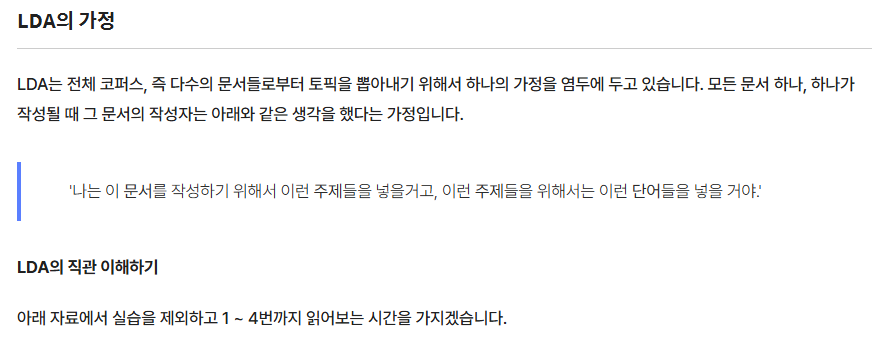
`위키독스: 잠재 디리클레 할당`: https://wikidocs.net/30708

## LDA 동영상 시청하기
55. 텍스트 데이터 분석 [토픽 모델] - (4) LDA 모형 :    
https://serviceapi.nmv.naver.com/flash/convertIframeTag.nhn?vid=A008B9E1EAFC02C99F92928155487839090E&outKey=V1210ad4156cf64ce0c6a3e18cecaae499f6528784c999ca6541c3e18cecaae499f65&width=544&height=306

#  (4) LDA 실습
* LDA 실습은 LSA 실습 과정에서 만들어둔 전처리가 완료된 train_data를 재사용한다고 가정한다.
* 역토큰화 과정을 거친 데이터

## TF-IDF 행렬 생성
* LDA는 DTM 또는 TF-IDF를 입력으로 받을 수 있습니다. 여기서는 TF-IDF를 사용
* TfidfVectorizer를 사용하여 TF-IDF 행렬을 생성
* 단어의 수는 5,000개로 제한
* TF-IDF 행렬을 생성한 후에는 행렬의 크기를 확인

In [25]:
# 상위 5,000개의 단어만 사용
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
tf_idf_matrix = tfidf_vectorizer.fit_transform(train_data)

# TF-IDF 행렬의 크기를 확인해봅시다.
print('행렬의 크기 :', tf_idf_matrix.shape)

행렬의 크기 : (1054983, 5000)


## scikit-learn LDA Model 활용
* 사이킷런의 LDA 모델을 사용하여 학습
* 토픽의 개수는 10개 이는 n_components의 인자값
* 시간이 수분 정도 소요될 것

In [26]:
from sklearn.decomposition import LatentDirichletAllocation

lda_model = LatentDirichletAllocation(n_components=10, learning_method='online', random_state=777, max_iter=1)
lda_model.fit_transform(tf_idf_matrix)

array([[0.0335099 , 0.0335099 , 0.0335099 , ..., 0.1702395 , 0.0335099 ,
        0.03351907],
       [0.03365628, 0.03365628, 0.03365628, ..., 0.03365628, 0.03365628,
        0.03365628],
       [0.25184095, 0.0366096 , 0.0366096 , ..., 0.45528225, 0.0366096 ,
        0.0366096 ],
       ...,
       [0.26688724, 0.02914502, 0.14077174, ..., 0.02914502, 0.02914502,
        0.02914502],
       [0.02637829, 0.0263834 , 0.11651895, ..., 0.39092402, 0.02637829,
        0.02637829],
       [0.03376055, 0.03376055, 0.03376055, ..., 0.40866263, 0.21169867,
        0.03376966]])

In [28]:
# LDA를 통해 얻은 결과 행렬의 크기를 확인
print(lda_model.components_.shape)

(10, 5000)


In [29]:
# 전체 코퍼스로부터 얻은 10개의 토픽과 각 토픽에서의 단어의 비중
terms = tfidf_vectorizer.get_feature_names_out() # 단어 집합. 5,000개의 단어가 저장됨.

def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(5)) for i in topic.argsort()[:-n-1:-1]])

get_topics(lda_model.components_, terms)

Topic 1: [('home', 4048.78778), ('hit', 3572.60152), ('market', 3141.55263), ('ban', 2995.63559), ('rise', 2909.02651)]
Topic 2: [('australia', 6721.04185), ('perth', 4551.37242), ('kill', 3977.09633), ('year', 3925.53959), ('say', 3395.39353)]
Topic 3: [('say', 7349.92516), ('court', 5250.21134), ('open', 3770.65617), ('state', 3656.60868), ('face', 3611.67807)]
Topic 4: [('man', 6521.51056), ('police', 6333.33358), ('charge', 5948.07591), ('queensland', 5552.61778), ('murder', 4677.1475)]
Topic 5: [('melbourne', 5298.43132), ('school', 3966.56666), ('report', 3792.92855), ('rural', 3521.89517), ('warn', 3379.34835)]
Topic 6: [('australian', 7674.39181), ('world', 4536.14226), ('country', 4168.83782), ('day', 3852.20674), ('crash', 3794.11334)]
Topic 7: [('election', 5416.23599), ('adelaide', 4868.15748), ('south', 4852.30258), ('house', 4481.58381), ('make', 3773.26989)]
Topic 8: [('canberra', 4323.53542), ('2016', 3962.69218), ('win', 3874.8274), ('qld', 3229.28135), ('price', 2762.

# 학습 정리

## LSA와 LDA의 차이
LSA는 DTM을 차원 축소하여 축소 차원에서 근접 단어들을 토픽으로 묶는 반면에,     
LDA는 단어가 특정 토픽에 존재할 확률과 문서에 특정 토픽이 존재할 확률을 결합 확률로 추정하여 토픽을 추출